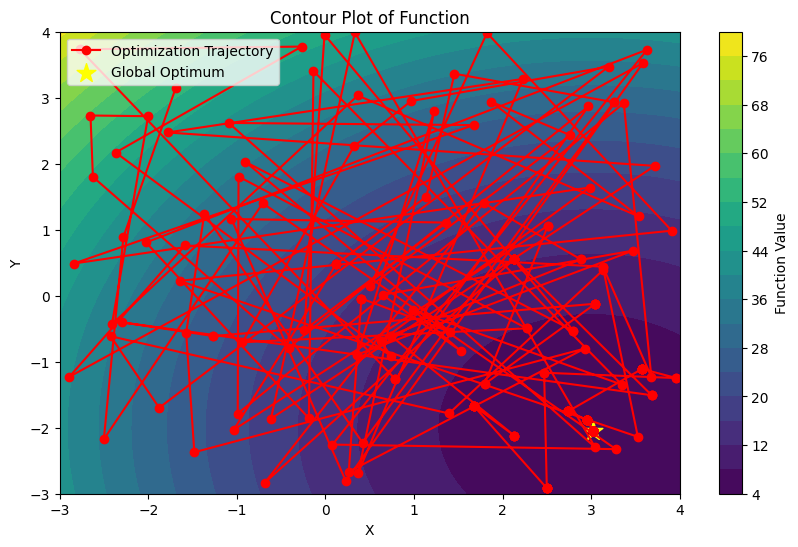

Optimal solution: (3.022901404758776, -2.0564166784838425)
Function value at optimal solution: 5.0037073159510745


In [46]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the two-variable function
def f(x, y):
    return (x-3)**2 + (y+2)**2 + 5  # Example function, you can replace it with any non-linear function

temperature = []
iteration = []

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)
    new_x = random.uniform(-3, 4)
    new_y = random.uniform(-3, 4)

    states = [(current_x, current_y)]
    function_values = [f(current_x, current_y)]

    for i in range(1, 1001):
        delta_E = f(new_x, new_y) - f(current_x, current_y)
        temperature.append(temp)

        if delta_E <= 0:
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        elif math.exp(-delta_E / temp) > random.uniform(0, 1):
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        else:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)

        states.append((current_x, current_y))
        function_values.append(f(current_x, current_y))
        iteration.append(i)

        temp = temp * 0.95

    return best_solution, best_value, states, function_values

# Simulate
best_solution, best_value, states, function_values = simulate(2000)

# Plot contour plot of the function
x = np.linspace(-3, 4, 100)
y = np.linspace(-3, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Function')

# Overlay the trajectory
x_traj = [s[0] for s in states]
y_traj = [s[1] for s in states]
plt.plot(x_traj, y_traj, marker='o', color='red', label='Optimization Trajectory')
plt.scatter(best_solution[0], best_solution[1], color='yellow', marker='*', s=200, label='Global Optimum')
plt.legend()

plt.show()

print("Optimal solution:", best_solution)
print("Function value at optimal solution:", best_value)

The simplest and most common temperature decrement rule is:

Tk +1 = aTk (11)
where a is a constant close to, but smaller than, 1. This exponential cooling scheme (ECS) was first
proposed with a= 0.95. In a linear cooling scheme (LCS) in which T is reduced every L trials:
Tk +1 = Tk - T (12)
The reductions achieved using the two schemes have been found to be comparable, and the final value of
f is, in general, improved with slower cooling rates, at the expense of greater computational effort. The
algorithm performance depends more on the cooling rate DT/L than on the individual values of DT and L.
Obviously, care must be taken to avoid negative temperatures when using the LCS.

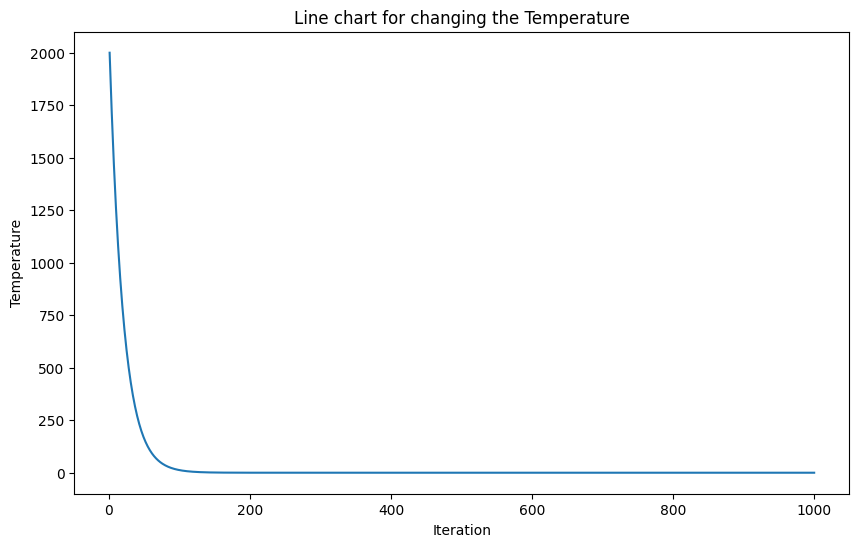

In [48]:
# Draw the plot for temperature vs iteration
plt.figure(figsize = (10,6))
plt.plot(iteration,temperature)
plt.title("Line chart for changing the Temperature")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.show()